# Data Transformation: Data Normalization

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import scipy.stats as stats
import pylab

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Loading
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Description
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Partner, Mr. Austen",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# Missing Values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_sample = titanic[['Age', 'Fare']]
titanic_sample.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


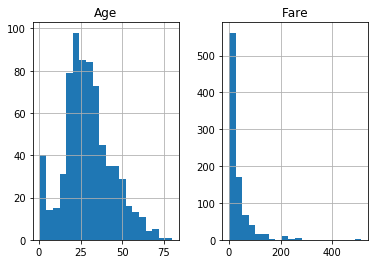

In [6]:
# Data Distribution
titanic_sample.hist(bins = 20)
plt.show()

In [7]:
# Filling Missing Data
titanic_sample.Age.fillna(titanic_sample.Age.median(), inplace = True)

#Alternative:
#
# titanic_sample.Age = titanic_sample.Age.fillna(titanic_sample.Age.median())


c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 1. Min-Max Normalization

In [8]:
# Steps to Normalize a Variable:
# 1. Create the object
# 2. Fit the data.
# 3. Transform the data

# Object Creation
scaler = MinMaxScaler()

# Data Fitting
scaler.fit(titanic_sample)

# Data Transformation
titanic_sample_minmax = scaler.transform(titanic_sample)

In [9]:
# np.array instead pd.dataframe
titanic_sample_minmax.shape

(891, 2)

In [10]:
# Main Statistical Variables
print("Mean: \n", titanic_sample_minmax.mean(axis = 0)) 
print("Std Dev: \n", titanic_sample_minmax.std(axis = 0)) 
print("Median: \n", np.median(titanic_sample_minmax, axis = 0)) 
print("Min: \n", titanic_sample_minmax.min(axis = 0)) 
print("Max: \n", titanic_sample_minmax.max(axis = 0)) 

Mean: 
 [0.3636791  0.06285843]
Std Dev: 
 [0.1635133  0.09694067]
Median: 
 [0.34656949 0.02821272]
Min: 
 [0. 0.]
Max: 
 [1. 1.]


In [11]:
def plots(df1, df2):
    plt.figure(figsize = (15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df1, bins = 20)
    plt.title("Original Data")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 2, 2)
    plt.hist(df2, bins = 20)
    plt.title("Normalized Data")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.figure(figsize = (5,5)) 
    sns.jointplot(df1, df2)
    plt.show()

MinMax Normalization: Age


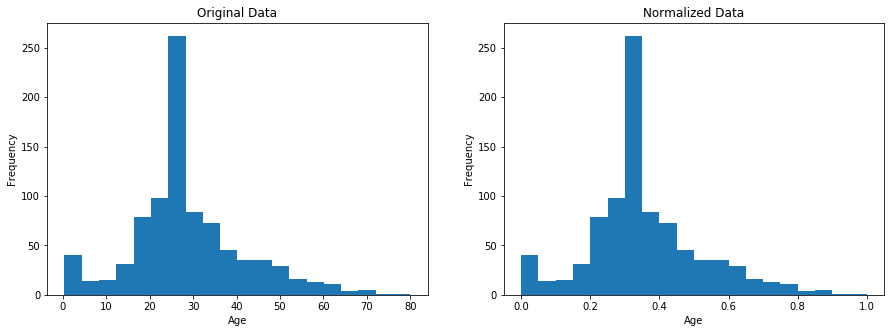

<Figure size 360x360 with 0 Axes>

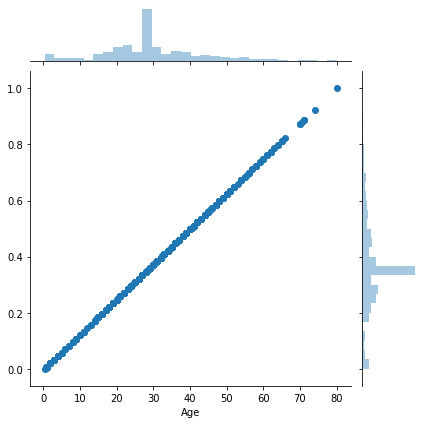

MinMax Normalization: Fare


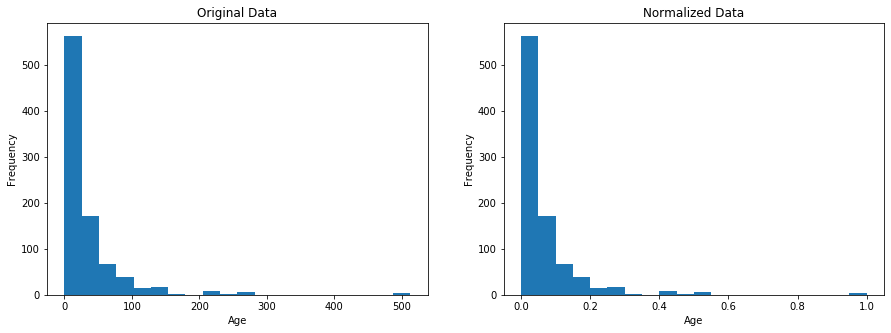

<Figure size 360x360 with 0 Axes>

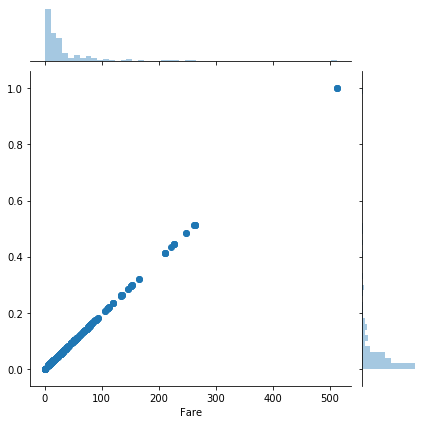

In [12]:
# Plotting Data
print("MinMax Normalization: Age")
plots(titanic_sample.Age, titanic_sample_minmax[:,0])

# Plotting Data
print("MinMax Normalization: Fare")
plots(titanic_sample.Fare, titanic_sample_minmax[:,1])

## 2. Z-Score Normalization

In [13]:
scaler = StandardScaler()
scaler.fit(titanic_sample)
titanic_sample_scaled = scaler.transform(titanic_sample)

In [14]:
# Main Statistical Variables
print("Mean: \n", titanic_sample_scaled.mean(axis = 0)) 
print("Std Dev: \n", titanic_sample_scaled.std(axis = 0)) 
print("Median: \n", np.median(titanic_sample_scaled, axis = 0)) 
print("Min: \n", titanic_sample_scaled.min(axis = 0)) 
print("Max: \n", titanic_sample_scaled.max(axis = 0)) 

Mean: 
 [2.27277979e-16 3.98733297e-18]
Std Dev: 
 [1. 1.]
Median: 
 [-0.1046374  -0.35739086]
Min: 
 [-2.22415608 -0.64842165]
Max: 
 [3.89155445 9.66716653]


Z-score Normalization: Age


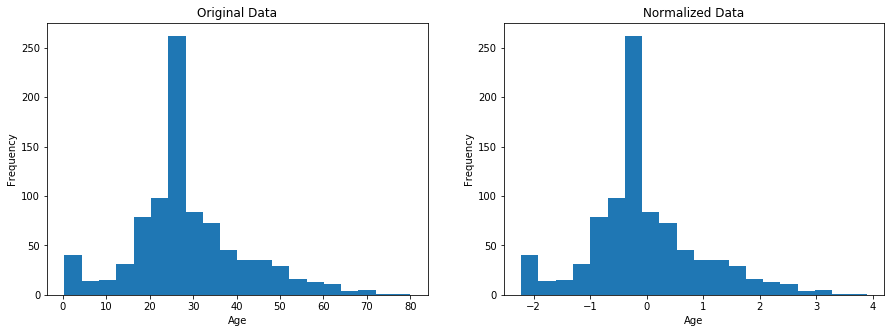

<Figure size 360x360 with 0 Axes>

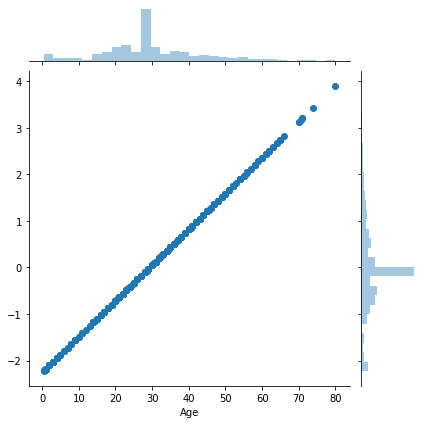

Z-score Normalization: Fare


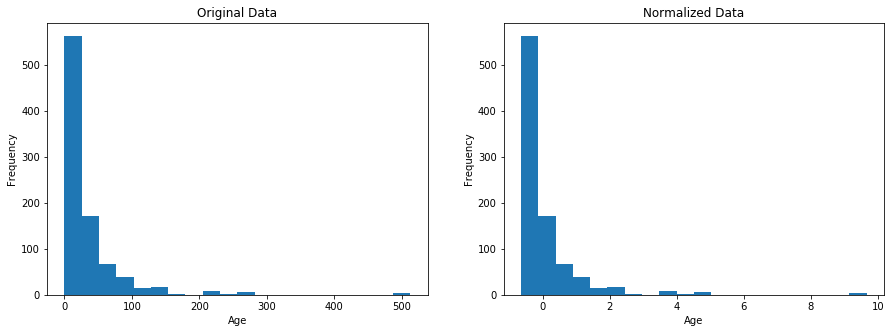

<Figure size 360x360 with 0 Axes>

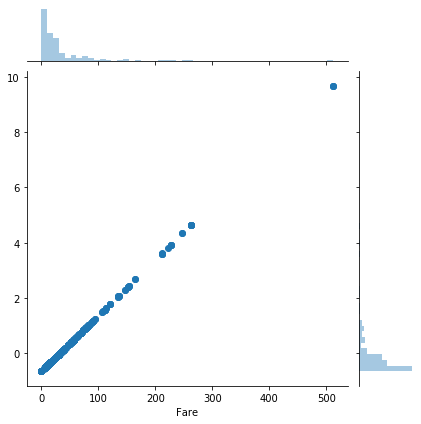

In [15]:
# Plotting Data
print("Z-score Normalization: Age")
plots(titanic_sample.Age, titanic_sample_scaled[:,0])

# Plotting Data
print("Z-score Normalization: Fare")
plots(titanic_sample.Fare, titanic_sample_scaled[:,1])

## 3. Robust (Median and IQR)

In [16]:
scaler = RobustScaler()
scaler.fit(titanic_sample)
titanic_sample_robust = scaler.transform(titanic_sample)

In [17]:
# Main Statistical Variables
print("Mean: \n", titanic_sample_robust.mean(axis = 0)) 
print("Std Dev: \n", titanic_sample_robust.std(axis = 0)) 
print("Median: \n", np.median(titanic_sample_robust, axis = 0)) 
print("Min: \n", titanic_sample_robust.min(axis = 0)) 
print("Max: \n", titanic_sample_robust.max(axis = 0)) 

Mean: 
 [0.10473711 0.76874471]
Std Dev: 
 [1.00095294 2.15099155]
Median: 
 [0. 0.]
Min: 
 [-2.12153846 -0.62600478]
Max: 
 [ 4.        21.5627382]


Robust Normalization: Age


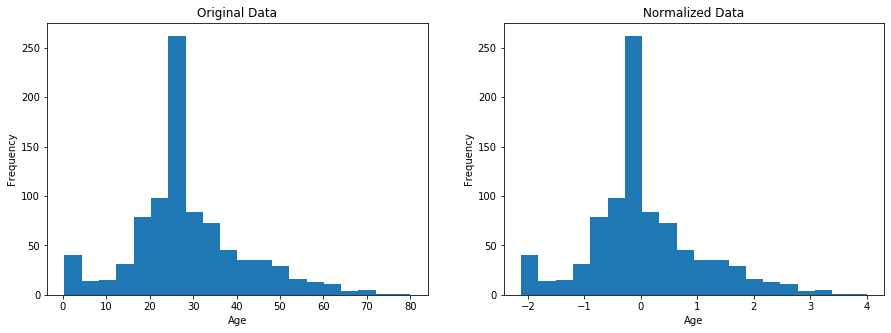

<Figure size 360x360 with 0 Axes>

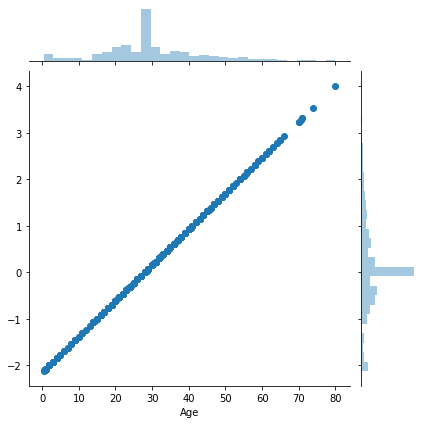

Robust Normalization: Fare


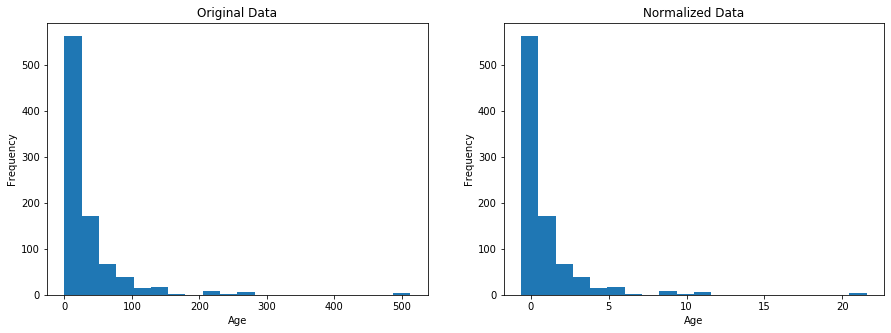

<Figure size 360x360 with 0 Axes>

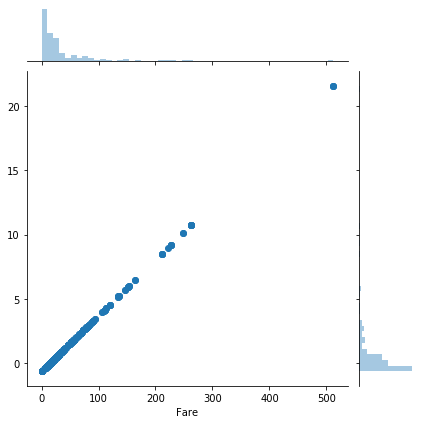

In [18]:
# Plotting Data
print("Robust Normalization: Age")
plots(titanic_sample.Age, titanic_sample_robust[:,0])

# Plotting Data
print("Robust Normalization: Fare")
plots(titanic_sample.Fare, titanic_sample_robust[:,1])

## 4. Gaussian Transformation

In [19]:
def qq_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

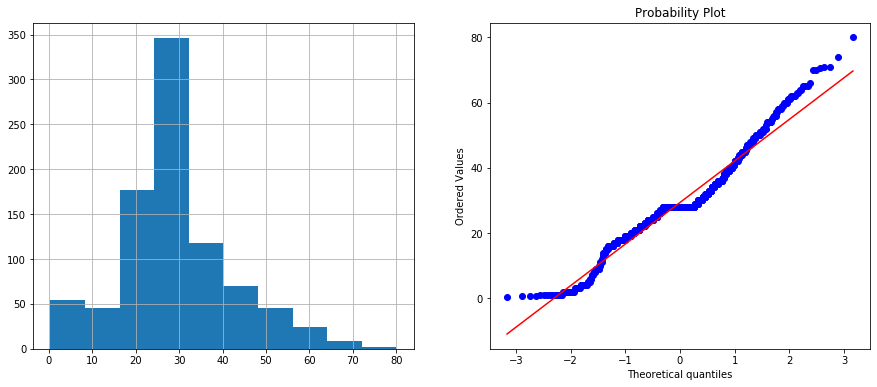

In [20]:
# Age Quantil-Quantil Plot
qq_plots(titanic_sample, 'Age')

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Logarithmic Transformation


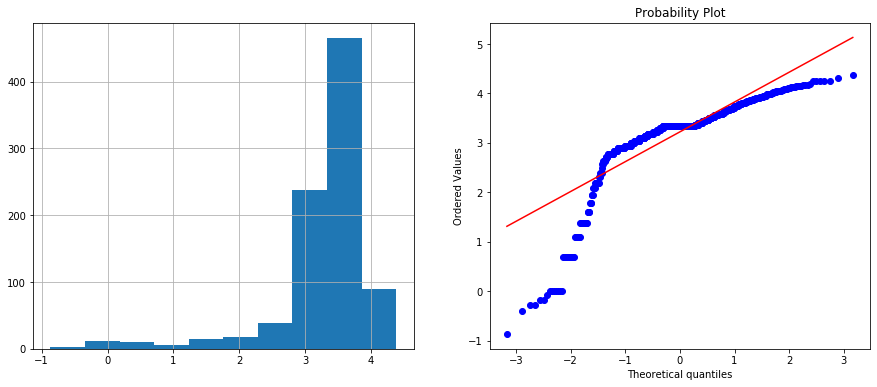

In [21]:
# Logarithmic Transformation
titanic_sample["Age_Log"] = np.log(titanic_sample.Age)

print("Logarithmic Transformation")
qq_plots(titanic_sample, 'Age_Log')

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


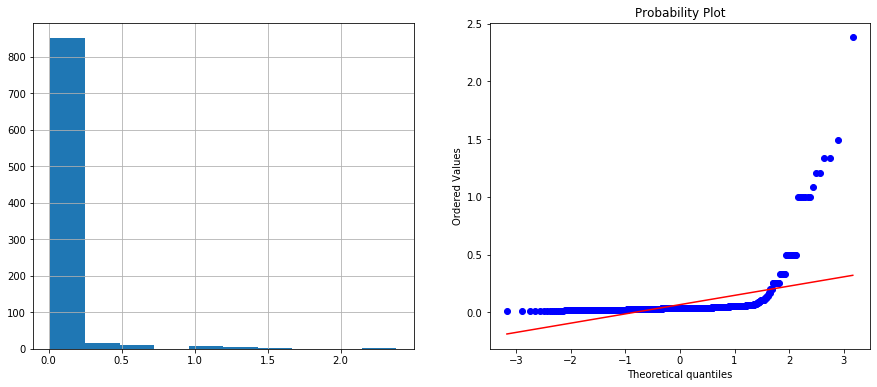

In [22]:
# Reciprocal Transformation
titanic_sample["Age_Reciprocal"] = 1 / titanic_sample.Age
qq_plots(titanic_sample, 'Age_Reciprocal')

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Square Root Transformation


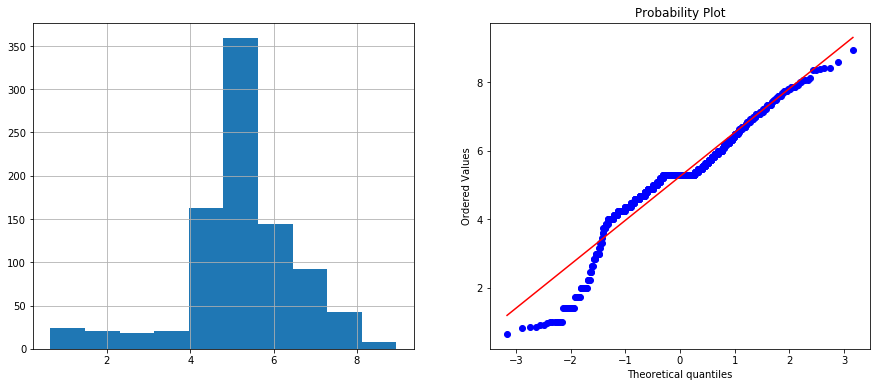

In [23]:
# Square Root Transformation
titanic_sample["Age_Sqr"] = titanic_sample.Age ** (1/2)

print("Square Root Transformation")
qq_plots(titanic_sample, 'Age_Sqr')

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Exponential Transformation


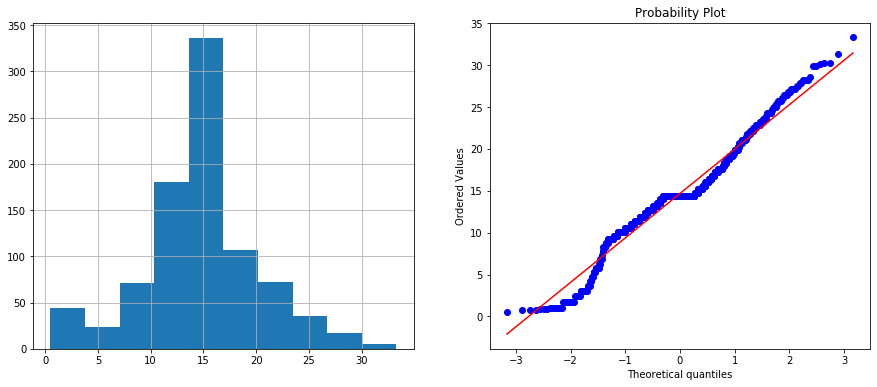

In [24]:
# Exponential Transformation
titanic_sample['Age_Exp'] = titanic_sample.Age**(0.8) 

print("Exponential Transformation")
qq_plots(titanic_sample, 'Age_Exp')

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Optimal lambda:  0.7964531473656952


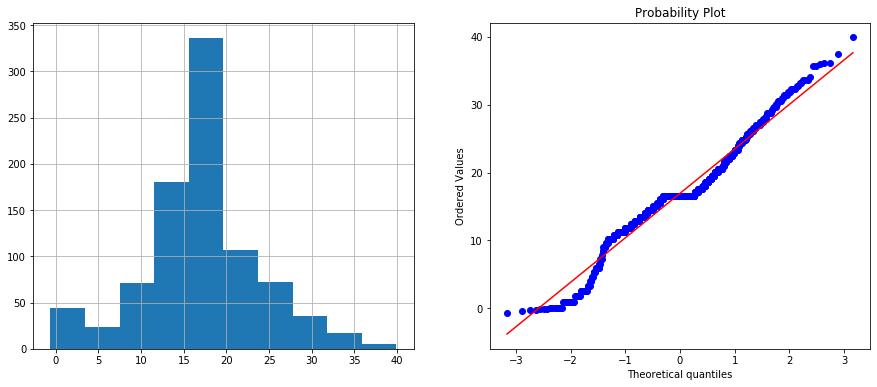

In [25]:
# BoxCos Transformation
titanic_sample['Age_BoxCox'], param = stats.boxcox(titanic_sample.Age)

print("Optimal lambda: ", param)
qq_plots(titanic_sample, 'Age_BoxCox')

** Activity 1**: Complete a similar analysis for the "Fare" attribute.

Based on:
* Feature Engineering/Course-Notebooks Repository ([Link](https://github.com/raytroop/FeatureEngineering/tree/master/Course-Notebooks))

In [ ]:
titanic_sample.Fare

c:\users\jeorv\onedrive\favori~2\desktop\escuela\3ercua~1\prepro~1\prepro~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Optimal lambda:  -0.09778702818680361


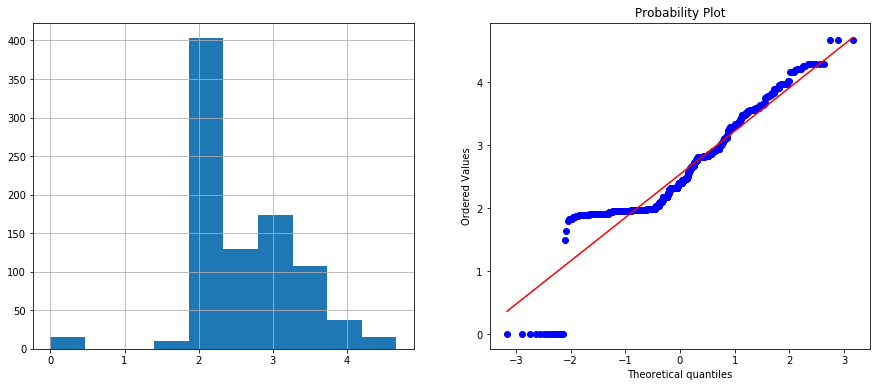

In [28]:
# BoxCos Transformation
titanic_sample['Fare_BoxCox'], param = stats.boxcox(titanic_sample.Fare + 1)

print("Optimal lambda: ", param)
qq_plots(titanic_sample, 'Fare_BoxCox')

In [27]:
titanic_sample 

,Age,Fare,Age_Log,Age_Reciprocal,Age_Sqr,Age_Exp,Age_BoxCox
0,22.0,7.2500,3.091042,0.045455,4.690416,11.855999,13.468119
1,38.0,71.2833,3.637586,0.026316,6.164414,18.358064,21.498728
2,26.0,7.9250,3.258097,0.038462,5.099020,13.551229,15.563417
3,35.0,53.1000,3.555348,0.028571,5.916080,17.189151,20.056110
4,35.0,8.0500,3.555348,0.028571,5.916080,17.189151,20.056110
...,...,...,...,...,...,...,...
886,27.0,13.0000,3.295837,0.037037,5.196152,13.966610,16.076643
887,19.0,30.0000,2.944439,0.052632,4.358899,10.543939,11.845513
888,28.0,23.4500,3.332205,0.035714,5.291503,14.378925,16.586014
889,26.0,30.0000,3.258097,0.038462,5.099020,13.551229,15.563417
